# Chapter 3 Classification

There are two most common tasks in **supervised machine learning**: **regression** (predicting values) and **classification** (predicting classes). In this chapter, we focuse on building classification systems.

## Data Preparation

We will use the MNIST dataset of handwritten images as an example.

- Load MNIST dataset using sklearn.datasets.fetch_mldata() or from http://yann.lecun.com/exdb/mnist/ with python-mnist package.
- Construct training set and test set. We will use training set to build the classifier, and use test set to evaluate its performance.
- Explore the dataset (find size of dataset, show a random image, show multiple images

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Attempt with fetch_openml()
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home='datasets')
mnist

ImportError: cannot import name 'fetch_openml'

In [2]:
# Attempt 1: get MNIST from mldata.org
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [28]:
# Attempt 2: Load the downloaded image files
# 1. Download file from LeCun's website
# 2. Decompress the four files
# 3. install python package python-mnist
# !pip install python-mnist

In [34]:
# from mnist import MNIST
# mndata = MNIST(r'C:\Users\ch002\Dropbox\Teaching\CMP464\Spring2019\Data\MNIST')
# train_images, train_labels = mndata.load_training()
# test_images, test_labels = mndata.load_testing()

In [35]:
# train_images = np.array(train_images)
# train_images.shape

(60000, 784)

In [36]:
# test_images = np.array(test_images)
# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)

In [3]:
mnist['DESCR']

'mldata.org dataset: mnist-original'

In [3]:
images = mnist['data']
labels = mnist['target']

In [40]:
images.shape

(70000, 784)

In [6]:
some_digit = images[12345]
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  49, 253, 193,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

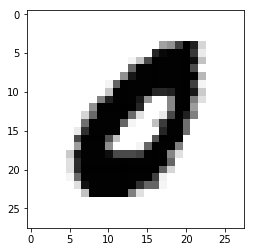

In [4]:
# Use imshow() from matplotlib to show the image
some_digit = images[123]
some_digit = some_digit.reshape([28, 28])
plt.imshow(some_digit,
           cmap=matplotlib.cm.binary)

##### Build a Binary Clasifier

To start, we aim at building a binary classifier to identify if an handwritten digit is five.

- Create the labels for binary classification (1 for five, and 0 for all other digits)
- Apply the **k-nearest-neighbor algorithm** using sklearn.neighbors.KNeighborsClassifier.
- Use its fit() method to train the model, use predict method to make predictions on given images.

In [12]:
type(labels)

numpy.ndarray

In [7]:
# Create an array labels_5 to store the truth value of the label being 5.
labels_5 = (labels == 5)

In [5]:
df_labels = pd.DataFrame(labels, columns=['Label'])
df_labels['Label'].value_counts()

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: Label, dtype: int64

In [6]:
df_labels_5 = pd.DataFrame(labels_5, columns=['Label'])
df_labels_5['Label'].value_counts()

False    63687
True      6313
Name: Label, dtype: int64

In [44]:
# the original labels are sorted
labels[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Split the dataset into training set and test set

We must reserve a portion of the data to test the model. The training set is used to train the model, and usually cannot be used to evaluate the model.

In [8]:
# split the dataset into training set and test set.
# usually we take about 15% as test data
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels_5, test_labels_5 = \
    train_test_split(images, labels_5, test_size = 0.15)

In [46]:
train_images.shape

(59500, 784)

In [47]:
train_labels_5.shape

(59500,)

In [25]:
train_labels_5[:100]

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

Next, we apply KNeighborsClassifier to build a binary classifier.

In [49]:
# VERY SLOW
# Apply KNN model to build the binary classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_images, train_labels_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# VERY SLOW 
# Use the model to make predictions on the test set
predictions_knn = knn.predict(test_images)

In [13]:
# Use SGDClassifier 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_images, train_labels_5)

C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
predictions = sgd.predict(test_images)

## K-Nearest Neighbor (KNN) Method

- Used to classify new data points based on "distance" to known data
- Find the K nearest neighbors, based on your distance metric
- Let them all vote on the classification

## Evaluate Performance of a Classifier

- Use sklearn.metrics.accuracy_score to calculate classification accuracy on the training set and on the test set.
- Display the images where the model predicts wrong.
- Use cross-validation to evaluate the performance of the model on various training and test sets.
- Use confusion matrix to show the percentage of **false positives** and **true negatives**.

In [15]:
# Calculate the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_5, predictions)
train_predictions = sgd.predict(train_images)
train_accuracy = accuracy_score(train_labels_5, train_predictions)
print(test_accuracy, train_accuracy)

0.962 0.965781512605042


#### Cross Validation
- partition the dataset into k mutully-exclusive subsets
- perform training on all but the 1st set, test the performance on the 1st set.
- perform training on all but the 2nd set, test the performance on the 2nd set.
- perform training on all but the 3rd set, test the performance on the 3rd set.
- ....
- perform training on all but the last set, test the performance on the last set.

In this way, the model is tested on k different training sets. If all performances are acceptable, we should have high confidence on the model.

In [18]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd, train_images, train_labels_5, cv=5,
                                 scoring='accuracy')

C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ch002\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ch002\Anaconda3\lib\sit

In [19]:
print(accuracy_scores)

[0.9610084  0.95613445 0.96806723 0.96739496 0.9612605 ]


### Confusion Matrix
For each pair of class A and B:
- count the number of instances of class A being classified as B
- count the number of instances of class B being classified as A

The numbers will form an $n\times n$ matrix, where $n$ is the number of classes.

In [20]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels_5, predictions)
print(conf_mat)

[[9474   68]
 [ 331  627]]


**For binary classifiers**:
confusion matrx = [[TN, FP], [FN, TP]]

- TN: true negative
- FP: false positive
- FN: false negative
- TP: true positive

**Precision** = TP / (TP + FP)

- What does precision represent?
- Can a bad model have high precision?


**Recall** = TP / (TP + FN)
- What does recall represent?
- Can a bad model have high recall?

$F_1$ **score**

$F_1 = \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$

## More Performance Measures

- Precision-Recall tradeoff
- Distribution of scores
- ROC (Receiver operation characteristic) curve: True positive rate vs. Negative positive rate
- AUC (Area under curve)

# Multiclass Classification

- Some models can directly handle multiple classes (Random forest, naive Bayes, neural networks)
- One vs. All: build a binary classifier for each class, compare their prediction scores
- One vs. One: build a binary classifier for each pair of classes, and see which class wins most duels

**Q: How to evaluate a multiclass classifier?**

Further topics:

- multilabel classification
- multioutput classification

## Homework

1. Training machine learning models on MNIST data with augmentation:
    - Use scipy.ndimage.interpolation.shift() function to shift each image in the MNIST training dataset in the following ways: 1) 1 pixel up; 2) 1 pixel down; 3) 1 pixel to the left; 4) 1 pixel to the right.
    - Use SGDClassifier to build a binary classifier on the augmented dataset that identifies if the image is **9**.
    - Evaluate the performance of the classifier by showing: 1) test accuracy; 2) confusion matrix; 

2. (extra credits) Chapter 3 Exercise 4: Build a spam classifer.